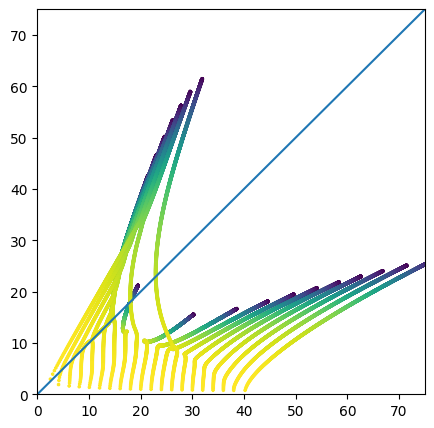

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize



def func_a(x):
    return x/(2*x+1)

def func_b(x):
    return (x+1)/(2*x+1)

def func_g(x):
    return x*(x+1)/(2*x+1)

def func_h(x):
    return x*(x+1)

def generate(P,n):
    matrix = np.zeros((n, n))
    matrix[0][0] = -1*func_h(1)
    if n>1:
        matrix[0][1] = func_b(2)
        if n%2==0:
            matrix[n-1][n-1] = -1*func_h(n)
            matrix[n-1][n-2] = P*func_g(n)
        if n%2==1:
            matrix[n-1][n-1] = -1*func_h(n)
            matrix[n-1][n-2] = func_a(n-1)
    for i in range(1,n-1):
        if i%2 == 0:
            for j in range(i-1,i+2):
                if j == i-1:
                    matrix[i][j] = func_a(i)
                elif j == i :
                    matrix[i][j] = -1*func_h(i+1)
                elif j == i + 1:
                    matrix[i][j] = func_b(i+2)
        if i%2 == 1:
            for j in range(i-1,i+2):
                if j == i-1:
                    matrix[i][j] = P*func_g(i)
                elif j == i :
                    matrix[i][j] = -1*func_h(i+1)
                elif j == i + 1:
                    matrix[i][j] = -P*func_g(i+2)
    return matrix

def get_eigvals(P,n,s='dont show'):
    matrix=generate(P,n)
    # print(matrix)

    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL,imL

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,marker='x')
        ax.scatter(x,y,marker='x',s=3,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)



'---------------------------------------------'
# s='show'
# # s='dont show'
# P=-10.7
# fig,ax=plt.subplots()
# for n in [1,2,3,4]:
#     print(n)
#     x,y = get_eigvals(P,n,s)
#     # print(x,y)
#     draw(ax,x,y,'n')

# ax.set_xlim(0,5)
# ax.set_ylim(0,5)
# ax.plot([0,5],[0,5])
# plt.legend(['n=1','n=2','n=3','n=4'])
# plt.show()

'---------------------------------------------'
# s='show'
s='dont show'
n=40
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
# for P in range(-15000,0,5):
# for P in [-7.3,-268,-3080,-11495]:
cmap = plt.cm.viridis
mini=-2000000
maxi=0
for P in range(mini,maxi,500):
    norm = Normalize(vmin=mini, vmax=maxi)
    x,y = get_eigvals(P,n,s)
    # print(x,y)
    draw(ax,x,y,'n',P)


ax.set_xlim(0,75)
ax.set_ylim(0,75)
ax.plot([0,75],[0,75])

# ax.set_xlim(0,n)
# ax.set_ylim(0,n)
# ax.plot([0,n],[0,n])

plt.show()

# '---------------------------------------------'

# n=20
# fig,ax=plt.subplots(figsize=(5,5),dpi=100)
# P=-7.4
# x,y = get_eigvals(P,n)
# # print(x,y)
# draw(ax,x,y,'n')
# ax.set_xlim(0,7.5)
# ax.set_ylim(0,7.5)
# ax.plot([0,7.5],[0,7.5])
# plt.show()

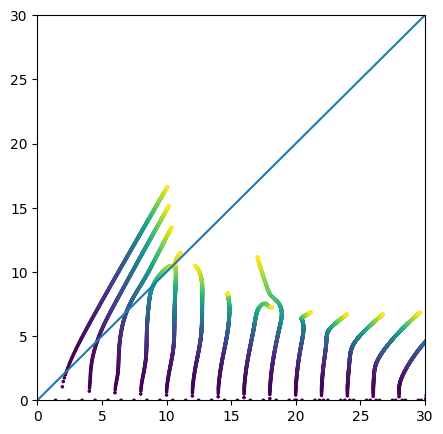

In [9]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize


def func_a(x):
    return x/(2*x+1)

def func_b(x):
    return (x+1)/(2*x+1)

def func_g(x):
    return x*(x+1)/(2*x+1)

def func_h(x):
    return x*(x+1)

def generate(P,n):
    matrix = np.zeros((n, n))
    matrix[0][0] = -1*func_h(1)
    if n>1:
        matrix[0][1] = -P*func_g(2)
        if n%2==1:
            matrix[n-1][n-1] = -1*func_h(n)
            matrix[n-1][n-2] = P*func_g(n-1)
        if n%2==0:
            matrix[n-1][n-1] = -1*func_h(n)
            matrix[n-1][n-2] = func_a(n-1)
    for i in range(1,n-1):
        if i%2 == 1:
            for j in range(i-1,i+2):
                if j == i-1:
                    matrix[i][j] = func_a(i)
                elif j == i :
                    matrix[i][j] = -1*func_h(i+1)
                elif j == i + 1:
                    matrix[i][j] = func_b(i+2)
        if i%2 == 0:
            for j in range(i-1,i+2):
                if j == i-1:
                    matrix[i][j] = P*func_g(i)
                elif j == i :
                    matrix[i][j] = -1*func_h(i+1)
                elif j == i + 1:
                    matrix[i][j] = -P*func_g(i+2)
    return matrix

def get_eigvals(P,n):
    matrix=generate(P,n)
    # print(matrix)


    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    # print(P)
    # print(*eigvals,sep='\n')
    # print('-'*100)

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
            # print('yes')
    return reL,imL

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,marker='x')
        ax.scatter(x,y,marker='x',s=3,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)



# P=-268
# fig,ax=plt.subplots()
# for n in [1,2,3]:
#     x,y = get_eigvals(P,n)
#     # print(x,y)
#     draw(ax,x,y,i)
# plt.legend(['n=1','n=2','n=40'])
# plt.show()

n=30
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
cmap = plt.cm.viridis
mini=0
maxi=50000
for P in range(mini,maxi,50):
# for P in [617,4693]:
    norm = Normalize(vmin=mini, vmax=maxi)
    x,y = get_eigvals(P,n)
    # print(x,y)
    draw(ax,x,y,'n',P)

ax.set_xlim(0,n)
ax.set_ylim(0,n)
# ax.set_xlim(0,5)
# ax.set_ylim(0,5)
ax.plot([0,50],[0,50])
plt.show()